# A quick example on how to deal with the data

This notebook serves as a little guidance on how to deal with the reduced brite data. Please look through this carefully, and take note of the comments.

In [1]:
#this should always be your starting point on any notebook. Loads the data types
from common import * 

/Users/marco/.brite


/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
# using the load function, you can load a certain field from your hard drive. It returns a list
# of possible stars, which you can use
stars = load(9)
stars

[HD 136504,
 HD 149438,
 HD 151890,
 HD 149038,
 HD 143275,
 HD 148478,
 HD 148688,
 HD 142669,
 HD 139365,
 HD 143118,
 HD 151804,
 HD 147165,
 HD 138690,
 HD 149404,
 HD 144294,
 HD 151985,
 HD 143018,
 HD 141556,
 HD 144217,
 HD 136298,
 HD 144470,
 HD 145502,
 HD 136664,
 HD 145482,
 HD 148703,
 HD 151680]

In [3]:
#pick one of the stars you are interested in
star = stars[0]

In [4]:
#most stars will have a number of subfolders, with multiple reductions in them. Pick the one
#you like
star.results

['05-06-2021_ME', '.DS_Store', 'Icon\r', '03-06-2021_GD', '1 - RAW']

In [5]:
#Feed the result you like into the get_data function which loads the data in the Data object
data = star.get_data(star.results[3])

Please choose a dataset by entering a number: 1): HD136504_09-Sco-I-2015_BLb_3_3_A.ndat
2): HD136504_09-Sco-I-2015_BLb_2_3_A.ndat
3): HD136504_09-Sco-I-2015_BLb_4_3_A.ndat
4): HD136504_09-Sco-I-2015_BLb_5_3_A.ndat
5): HD136504_09-Sco-I-2015_BLb_1_3_A.ndat
6): HD136504_09-Sco-I-2015_BLb_6_3_A.ndat2


/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 760 of "dubious year (Note 3)"
  ErfaWarning)


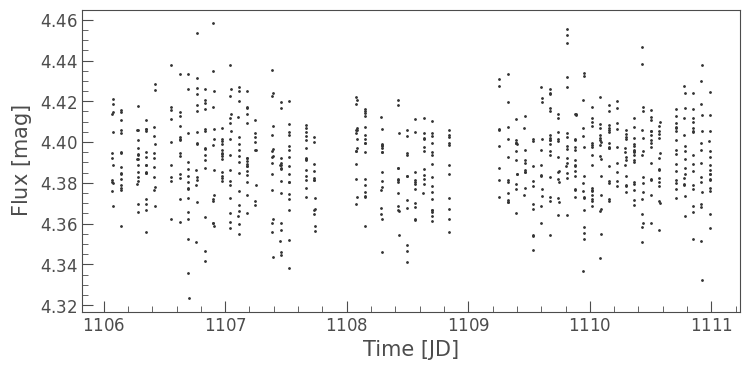

In [6]:
#Now you can plot the data :)
data.scatter()

/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)
/Users/marco/Documents/code/science/Brite-Decorrelation-Codes/venv/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 760 of "dubious year (Note 3)"
  ErfaWarning)


<AxesSubplot:xlabel='Frequency [$\\mathrm{\\frac{1}{d}}$]', ylabel='Power [$\\mathrm{mag}$]'>

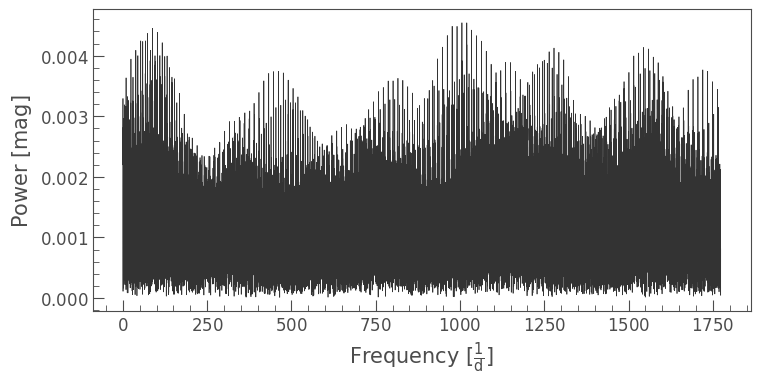

In [7]:
#You can also convert any given lightcurve into a periodogram
data.to_periodogram().plot()

point to point scatter
T, 1/T
Anzahl Datenpunkte pro Stern
Time sampling
Noise


In [8]:
star.simbad

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
* eps Lup,15 22 40.8682,-44 41 22.614,11,11,0.490,0.450,90,A,O,2007A&A...474..653V,1
